Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [ ]:
!pip install pymystem3

In [ ]:
import re

In [ ]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [ ]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [ ]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [ ]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
import string

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [45]:
import nltk
nltk.download('averaged_perceptron_tagger_rus')
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_rus.zip.


[('И', 'CONJ'),
 ('пунша', 'S'),
 ('пламень', 'S'),
 ('голубой', 'A=m'),
 ('.', 'NONLEX'),
 ('Люблю', 'V'),
 ('воинственную', 'A=f'),
 ('живость', 'S'),
 ('Потешных', 'A=pl'),
 ('Марсовых', 'A=pl'),
 ('полей', 'S'),
 (',', 'NONLEX'),
 ('Пехотных', 'A=pl'),
 ('ратей', 'S'),
 ('и', 'CONJ'),
 ('коней', 'A=f'),
 ('Однообразную', 'A=f'),
 ('красивость', 'S'),
 (',', 'NONLEX'),
 ('В', 'PR'),
 ('их', 'A-PRO'),
 ('стройно', 'ADV'),
 ('зыблемом', 'V'),
 ('строю', 'S'),
 ('Лоскутья', 'S'),
 ('сих', 'A-PRO=pl'),
 ('знамён', 'S'),
 ('победных', 'A=pl'),
 (',', 'NONLEX'),
 ('Сиянье', 'S'),
 ('шапок', 'S'),
 ('этих', 'A-PRO=pl'),
 ('медных', 'A=pl'),
 (',', 'NONLEX'),
 ('Насквозь', 'ADV'),
 ('простреленных', 'V'),
 ('в', 'PR'),
 ('бою', 'S'),
 ('.', 'NONLEX')]

Можно "подклеить" для удобства тэги к слову.

In [30]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [32]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [35]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [36]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [37]:
from nltk import FreqDist

In [38]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [40]:
stop_words = set(stopwords.words("english"))

In [41]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

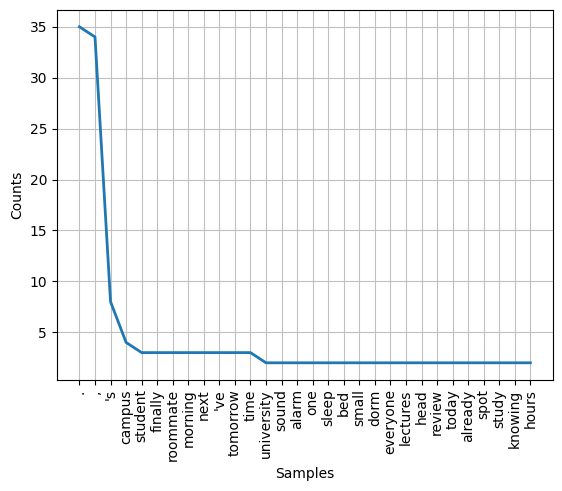

In [42]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [43]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

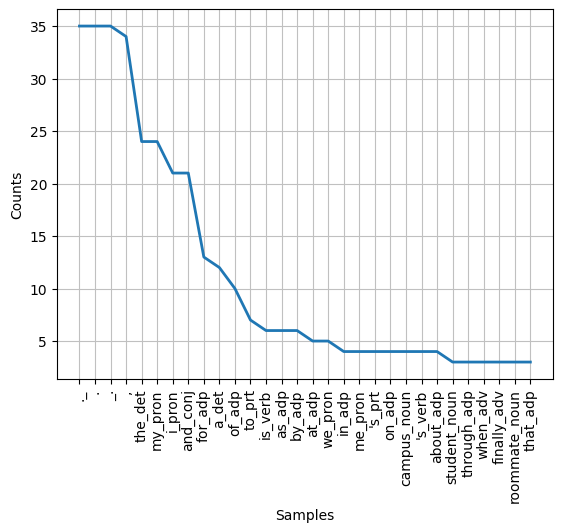

In [44]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?
    Ответ: немного отличаются, особенно когда применяется разметка на части речи   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [46]:
!pip install nltk spacy pymorphy2 natasha
!python -m spacy download ru_core_news_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
nlp_ru = spacy.load("ru_core_news_sm")
english_stopwords = set(stopwords.words('english'))
nlp_en = spacy.load("en_core_web_sm")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=72d7803573b63343161edc3da8bd7a99eff391148e143dcb7780067fdb36a96a
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload de

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
english_text = "english_text.txt"
russian_text = "russian_text.txt"

# Reading English text
with open(english_text, 'r', encoding='utf-8') as file:
    english_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(english_text)} символов")

# Reading Russian text
with open(russian_text, 'r', encoding='utf-8') as file:
    russian_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(russian_text)} символов")

def clean_text(original_text):
    punctuation = string.punctuation
    translator = str.maketrans('', '', punctuation)
    original_text = original_text.translate(translator)
    text = original_text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join(text.split())
    return text

# Tokenize (Первый способ)
russian_text = clean_text(russian_text)
rus_text_tokens_nltk = word_tokenize(russian_text)
rus_filtered_tokens = [token for token in rus_text_tokens_nltk if token not in russian_stopwords]
print(rus_filtered_tokens)

eng_text_tokens_nltk = word_tokenize(english_text)
english_text = clean_text(english_text)
eng_text_tokens_nltk = word_tokenize(english_text)
eng_filtered_tokens = [token for token in eng_text_tokens_nltk if token not in english_stopwords]
print(eng_filtered_tokens)



Файл успешно прочитан. Длина текста: 5493 символов
Файл успешно прочитан. Длина текста: 4684 символов
['отец', 'андрей', 'петрович', 'гринев', 'молодости', 'своей', 'служил', 'графе', 'минихе', 'вышел', 'отставку', 'премьермайором', 'году', 'тех', 'пор', 'жил', 'своей', 'симбирской', 'деревне', 'женился', 'девице', 'авдотье', 'васильевне', 'ю', 'дочери', 'бедного', 'тамошнего', 'дворянина', 'девять', 'человек', 'детей', 'мои', 'братья', 'сестры', 'умерли', 'младенчестве', 'матушка', 'мною', 'брюхата', 'записан', 'семеновский', 'полк', 'сержантом', 'милости', 'майора', 'гвардии', 'князя', 'близкого', 'нашего', 'родственника', 'паче', 'всякого', 'чаяния', 'матушка', 'родила', 'дочь', 'батюшка', 'объявил', 'следовало', 'смерти', 'неявившегося', 'сержанта', 'дело', 'кончилось', 'считался', 'отпуску', 'окончания', 'наук', 'время', 'воспитывались', 'пононешнему', 'пятилетнего', 'возраста', 'отдан', 'руки', 'стремянному', 'савельичу', 'трезвое', 'поведение', 'пожалованному', 'дядьки', 'надзор

<Axes: xlabel='Samples', ylabel='Counts'>

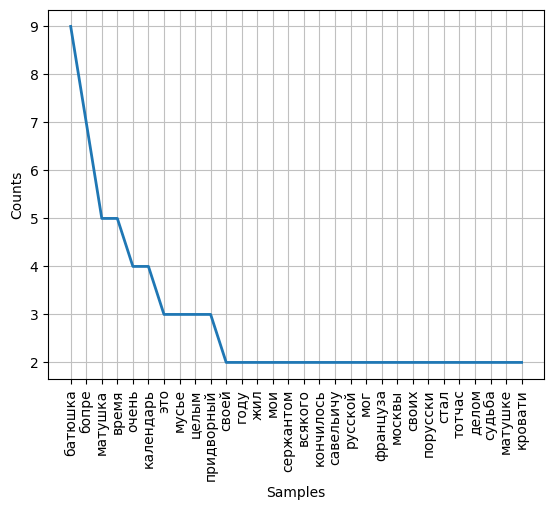

In [48]:
frequency_distribution_1 = FreqDist(rus_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

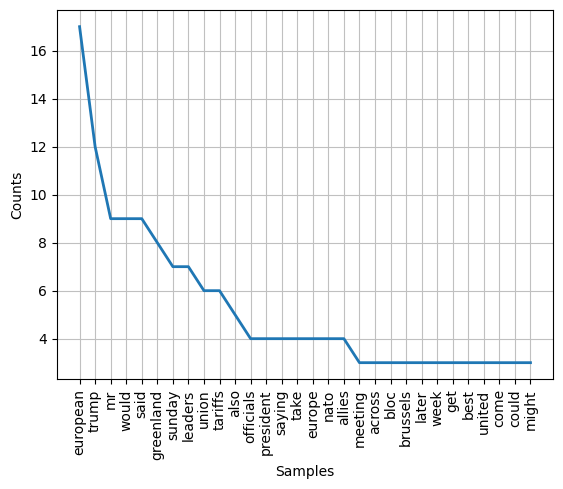

In [49]:
frequency_distribution_2 = FreqDist(eng_filtered_tokens)
frequency_distribution_2.plot(30, cumulative=False)

In [50]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('universal_tagset')


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [51]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [52]:
tagged_rus = nltk.pos_tag(rus_filtered_tokens)
tagged_eng = nltk.pos_tag(eng_filtered_tokens)

In [53]:
# Разметить на чати речи. Второй способ
rus_list_of_tagged = []
for elem in tagged_rus:
    tag_tog = '_'.join(elem)
    rus_list_of_tagged.append(tag_tog)
print(rus_list_of_tagged)

['отец_JJ', 'андрей_NNP', 'петрович_NNP', 'гринев_NNP', 'молодости_NNP', 'своей_NNP', 'служил_NNP', 'графе_NNP', 'минихе_NNP', 'вышел_NNP', 'отставку_NNP', 'премьермайором_NNP', 'году_NNP', 'тех_NNP', 'пор_NNP', 'жил_NNP', 'своей_NNP', 'симбирской_NNP', 'деревне_NNP', 'женился_NNP', 'девице_NNP', 'авдотье_NNP', 'васильевне_NNP', 'ю_NNP', 'дочери_NNP', 'бедного_NNP', 'тамошнего_NNP', 'дворянина_NNP', 'девять_NNP', 'человек_NNP', 'детей_NNP', 'мои_NNP', 'братья_NNP', 'сестры_NNP', 'умерли_NNP', 'младенчестве_NNP', 'матушка_NNP', 'мною_NNP', 'брюхата_NNP', 'записан_NNP', 'семеновский_NNP', 'полк_NNP', 'сержантом_NNP', 'милости_NNP', 'майора_NNP', 'гвардии_NNP', 'князя_NNP', 'близкого_NNP', 'нашего_NNP', 'родственника_NNP', 'паче_NNP', 'всякого_NNP', 'чаяния_NNP', 'матушка_NNP', 'родила_NNP', 'дочь_NNP', 'батюшка_NNP', 'объявил_NNP', 'следовало_NNP', 'смерти_NNP', 'неявившегося_NNP', 'сержанта_NNP', 'дело_NNP', 'кончилось_NNP', 'считался_NNP', 'отпуску_NNP', 'окончания_NNP', 'наук_NNP', 'в

<Axes: xlabel='Samples', ylabel='Counts'>

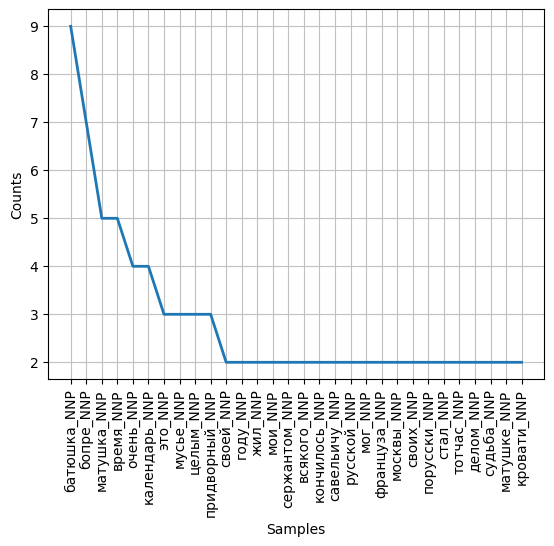

In [54]:
frequency_distribution_3 = FreqDist(rus_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [57]:
eng_list_of_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    eng_list_of_tagged.append(tag_tog)
print(eng_list_of_tagged)

['european_JJ', 'union_NN', 'officials_NNS', 'lean_VBP', 'toward_IN', 'negotiating_VBG', 'retaliating_VBG', 'trump_NN', 'tariff_NN', 'threat_NN', 'european_JJ', 'union_NN', 'ambassadors_NNS', 'held_VBD', 'emergency_NN', 'meeting_NN', 'sunday_JJ', 'leaders_NNS', 'across_IN', 'nation_NN', 'bloc_NN', 'meet_NN', 'brussels_NNS', 'later_RBR', 'week_NN', 'faced_VBN', 'threat_NN', 'punishing_VBG', 'tariffs_NNS', 'president_NN', 'trump_NNS', 'get_VBP', 'way_NN', 'acquiring_VBG', 'greenland_JJ', 'european_JJ', 'union_NN', 'leaders_NNS', 'began_VBD', 'coalesce_VBG', 'around_IN', 'negotiation_NN', 'strategy_NN', 'sunday_NN', 'without_IN', 'ruling_VBG', 'retaliatory_NN', 'taxes_NNS', 'mr_VBD', 'trump_NN', 'saturday_NN', 'demanded_VBD', 'deal_NN', 'buy_VB', 'greenland_NN', 'saying_VBG', 'social_JJ', 'media_NNS', 'otherwise_RB', 'would_MD', 'slap_VB', 'tariffs_NNS', 'group_NN', 'european_JJ', 'nations_NNS', 'starting_VBG', 'percent_NN', 'february_JJ', 'ramping_VBG', 'percent_NN', 'june_NN', 'sunday_J

<Axes: xlabel='Samples', ylabel='Counts'>

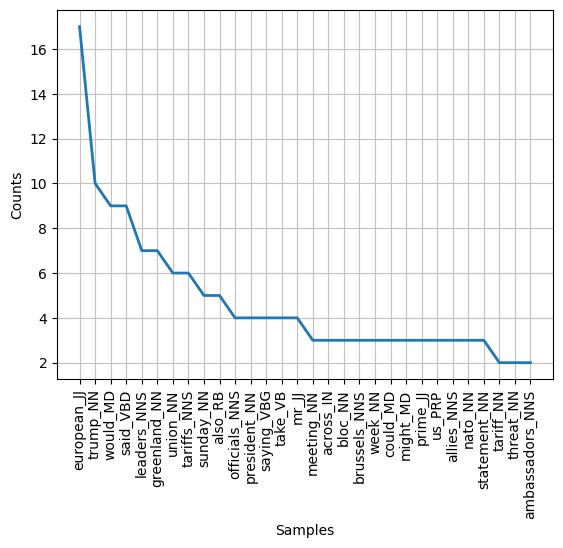

In [58]:
frequency_distribution_3 = FreqDist(eng_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [59]:
# Лемма и стемм. Третий способ
joined_tokens = ' '.join(rus_filtered_tokens)
doc = nlp_ru(joined_tokens)
lemmas = [token.lemma_ for token in doc if token.is_alpha]

stemmer = SnowballStemmer("russian")
words = re.findall(r'\b\w+\b', joined_tokens)
stems = [stemmer.stem(word) for word in words]
print(stems)
print(lemmas)

['отец', 'андр', 'петрович', 'грин', 'молод', 'сво', 'служ', 'граф', 'миних', 'вышел', 'отставк', 'премьермайор', 'год', 'тех', 'пор', 'жил', 'сво', 'симбирск', 'деревн', 'жен', 'девиц', 'авдот', 'васильевн', 'ю', 'дочер', 'бедн', 'тамошн', 'дворянин', 'девя', 'человек', 'дет', 'мо', 'брат', 'сестр', 'умерл', 'младенчеств', 'матушк', 'мно', 'брюхат', 'записа', 'семеновск', 'полк', 'сержант', 'милост', 'майор', 'гвард', 'княз', 'близк', 'наш', 'родственник', 'пач', 'всяк', 'чаян', 'матушк', 'род', 'доч', 'батюшк', 'объяв', 'следова', 'смерт', 'неяв', 'сержант', 'дел', 'конч', 'счита', 'отпуск', 'окончан', 'наук', 'врем', 'воспитыва', 'пононешн', 'пятилетн', 'возраст', 'отда', 'рук', 'стремя', 'савельич', 'трезв', 'поведен', 'пожалова', 'дядьк', 'надзор', 'двенадцат', 'год', 'выуч', 'русск', 'грамот', 'мог', 'очен', 'здрав', 'суд', 'свойств', 'борз', 'кобел', 'эт', 'врем', 'батюшк', 'наня', 'француз', 'мос', 'бопр', 'котор', 'выписа', 'москв', 'вмест', 'годов', 'запас', 'вин', 'прованск'

<Axes: xlabel='Samples', ylabel='Counts'>

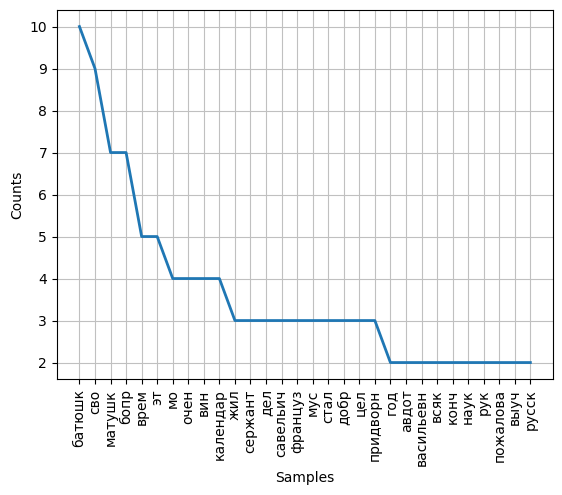

In [60]:
frequency_distribution_4 = FreqDist(stems)
frequency_distribution_4.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

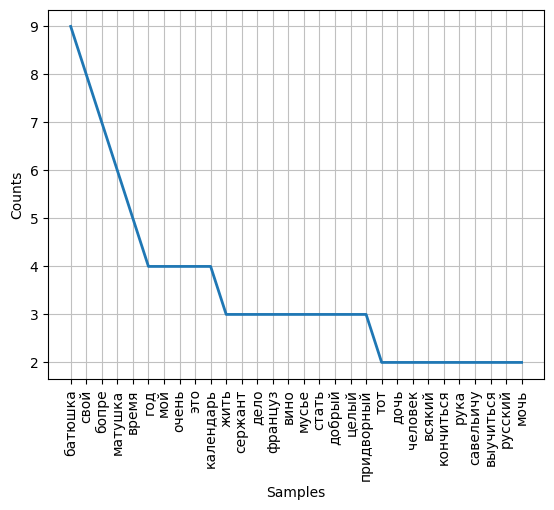

In [61]:
frequency_distribution_5 = FreqDist(lemmas)
frequency_distribution_5.plot(30, cumulative=False)

In [62]:
joined_tokens = ' '.join(eng_filtered_tokens)
doc = nlp_en(joined_tokens)
lemmas = [token.lemma_ for token in doc if token.is_alpha]

stemmer = SnowballStemmer("english")
words = re.findall(r'\b\w+\b', joined_tokens)
stems = [stemmer.stem(word) for word in words]
print(stems)
print(lemmas)

['european', 'union', 'offici', 'lean', 'toward', 'negoti', 'retali', 'trump', 'tariff', 'threat', 'european', 'union', 'ambassador', 'held', 'emerg', 'meet', 'sunday', 'leader', 'across', 'nation', 'bloc', 'meet', 'brussel', 'later', 'week', 'face', 'threat', 'punish', 'tariff', 'presid', 'trump', 'get', 'way', 'acquir', 'greenland', 'european', 'union', 'leader', 'began', 'coalesc', 'around', 'negoti', 'strategi', 'sunday', 'without', 'rule', 'retaliatori', 'tax', 'mr', 'trump', 'saturday', 'demand', 'deal', 'buy', 'greenland', 'say', 'social', 'media', 'otherwis', 'would', 'slap', 'tariff', 'group', 'european', 'nation', 'start', 'percent', 'februari', 'ramp', 'percent', 'june', 'sunday', 'ambassador', 'across', 'nation', 'bloc', 'met', 'brussel', 'take', 'stock', 'situat', 'preliminari', 'talk', 'made', 'thing', 'clear', 'offici', 'would', 'rather', 'negoti', 'retali', 'one', 'also', 'commit', 'protect', 'greenland', 'autonom', 'territori', 'denmark', 'bought', 'taken', 'peopl', 'w

<Axes: xlabel='Samples', ylabel='Counts'>

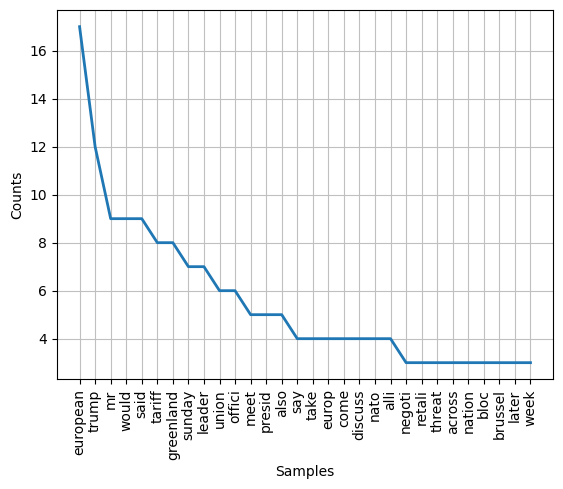

In [63]:
frequency_distribution_6 = FreqDist(stems)
frequency_distribution_6.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

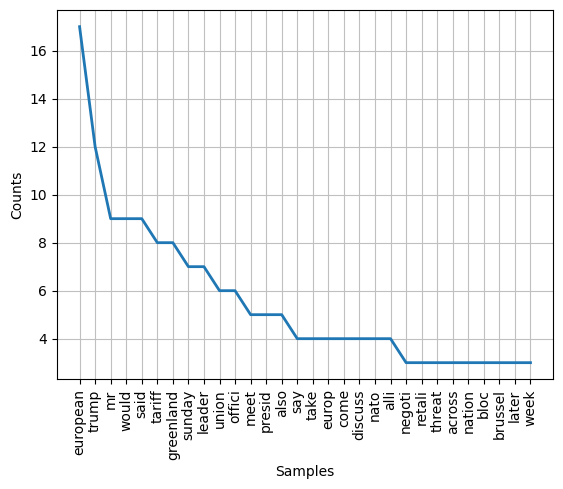

In [64]:
frequency_distribution_7 = FreqDist(stems)
frequency_distribution_7.plot(30, cumulative=False)